<a href="https://colab.research.google.com/github/Disha-16/Fraud_Detection_in_Ethereum_Transaction_using_Ensemble_Learning/blob/main/Final_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:

pip install colorama


In [147]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [148]:
pip install catboost


In [149]:
import numpy as np
import pandas as pd

# For data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# For Handling Imbalanced Dataset
import imblearn as imb

# For Create Beautiful Reports
from colorama import Fore

# Machine loarning
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import  StandardScaler
from sklearn.metrics import *
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# For save our model
import joblib

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
import catboost as ctb
import warnings
warnings.filterwarnings('ignore')

In [150]:
path = '/content/drive/MyDrive/Fraud_Detection_in_Ethereum_Transaction/transaction_dataset.csv'
df = pd.read_csv(path)
df.sample(3)

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
9157,9157,1496,0xad274ba3de7f07c7973c7b40b0111ff53dd14b06,1,0.00,0.00,4777.82,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4750,4750,1818,0x7e54353feed182b898433042d4ac17049d52dace,0,5266.17,2079.55,477202.53,61,75,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,NaN,VIU
9438,9438,1777,0xd0acac843aaab4cef20b322405405e67e90147d1,1,318.37,214.04,6410.40,4,24,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,,GSENetwork


In [151]:
df = df.iloc[:, 2:]
df

,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,1,12635.10,631.39,58748.48,4,13,0,11,4,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,2.0,,GSENetwork
9837,0xff718805bb9199ebf024ab6acd333e603ad77c85,1,0.00,0.00,0.00,0,0,0,0,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
9838,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,1,2499.44,2189.29,261601.88,67,43,0,31,44,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,5.0,,Free BOB Tokens - BobsRepair.com
9839,0xffde23396d57e10abf58bd929bb1e856c7718218,1,0.00,0.00,0.00,0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
def explore_data(data):
    print(f'Size of Data Frame: {data.size}\n\n')
    print(f'Shape of Data Frame : {data.shape}\n\n')
    print(f'Data Frame Columns: {data.columns}\n\n')
    print(f'Data Frame Data Types:\n{data.dtypes}\n\n')
    print(f'Data Frame Head: \n{data.head(5)}\n\n')
    print(f'Data Frame tail: \n{data.tail(5)}\n\n')
    print(f'Data Frame Information:\n{data.info()}\n\n')
    print(f'Data Frame Null Values: \n{data.isnull().sum()}\n\n')
    print(f'Descriptions of Data Frame: \n{data.describe()}\n\n')

explore_data(df)

Size of Data Frame: 482209


Shape of Data Frame : (9841, 49)


Data Frame Columns: Index(['Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contra

In [153]:
category = df.select_dtypes('O').columns.astype('category')
df[category]

,Address,ERC20 most sent token type,ERC20_most_rec_token_type
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,Cofoundit,Numeraire
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,Livepeer Token,Livepeer Token
2,0x0002bda54cb772d040f779e88eb453cac0daa244,NaN,XENON
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,Raiden,XENON
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,StatusNetwork,EOS
...,...,...,...
9836,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,,GSENetwork
9837,0xff718805bb9199ebf024ab6acd333e603ad77c85,,Blockwell say NOTSAFU
9838,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,,Free BOB Tokens - BobsRepair.com
9839,0xffde23396d57e10abf58bd929bb1e856c7718218,NaN,NaN


In [154]:
df.drop(columns=category, inplace=True)

In [155]:
df.fillna(df.median(), inplace=True)
df.isnull().sum()

FLAG                                                    0
Avg min between sent tnx                                0
Avg min between received tnx                            0
Time Diff between first and last (Mins)                 0
Sent tnx                                                0
Received Tnx                                            0
Number of Created Contracts                             0
Unique Received From Addresses                          0
Unique Sent To Addresses                                0
min value received                                      0
max value received                                      0
avg val received                                        0
min val sent                                            0
max val sent                                            0
avg val sent                                            0
min value sent to contract                              0
max val sent to contract                                0
avg value sent

In [156]:
no_var = df.var() == 0
df.var()[no_var]

 ERC20 avg time between sent tnx        0.0
 ERC20 avg time between rec tnx         0.0
 ERC20 avg time between rec 2 tnx       0.0
 ERC20 avg time between contract tnx    0.0
 ERC20 min val sent contract            0.0
 ERC20 max val sent contract            0.0
 ERC20 avg val sent contract            0.0
dtype: float64

In [157]:
df.drop(df.var()[no_var].index, axis=1, inplace=True)

In [158]:
df.shape

(9841, 39)

Dropping those features which have bad distribution

In [159]:
no_pattern_cols = []
for i in df.columns[1:]:
    if len(df[i].value_counts()) < 10:
        print(f'The Column {i}: has this uniques values:\n{df[i].value_counts()}\n')
        print('-'*40)
        no_pattern_cols.append(i)

The Column min value sent to contract: has this uniques values:
min value sent to contract
0.00    9839
0.02       1
0.01       1
Name: count, dtype: int64

----------------------------------------
The Column max val sent to contract: has this uniques values:
max val sent to contract
0.000000    9838
0.020000       1
0.010000       1
0.046029       1
Name: count, dtype: int64

----------------------------------------
The Column avg value sent to contract: has this uniques values:
avg value sent to contract
0.000000    9838
0.020000       1
0.010000       1
0.023014       1
Name: count, dtype: int64

----------------------------------------
The Column total ether sent contracts: has this uniques values:
total ether sent contracts
0.000000    9838
0.020000       1
0.010000       1
0.046029       1
Name: count, dtype: int64

----------------------------------------
The Column  ERC20 uniq sent addr.1: has this uniques values:
 ERC20 uniq sent addr.1
0.0    9813
1.0      26
3.0       1
2.0 

In [160]:
no_pattern_cols

['min value sent to contract',
 'max val sent to contract',
 'avg value sent to contract',
 'total ether sent contracts',
 ' ERC20 uniq sent addr.1']

In [161]:
df.drop(columns=no_pattern_cols, inplace=True)

In [162]:
explore_data(df)

Size of Data Frame: 334594


Shape of Data Frame : (9841, 34)


Data Frame Columns: Index(['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq rec contract addr', ' ERC20 min val rec',
       ' ERC20 max val rec', ' ERC20 avg val rec', ' ERC20 min val sent',
       ' ERC20 max val sent', ' ERC20 avg val sent',
       ' ERC20 uniq sent 

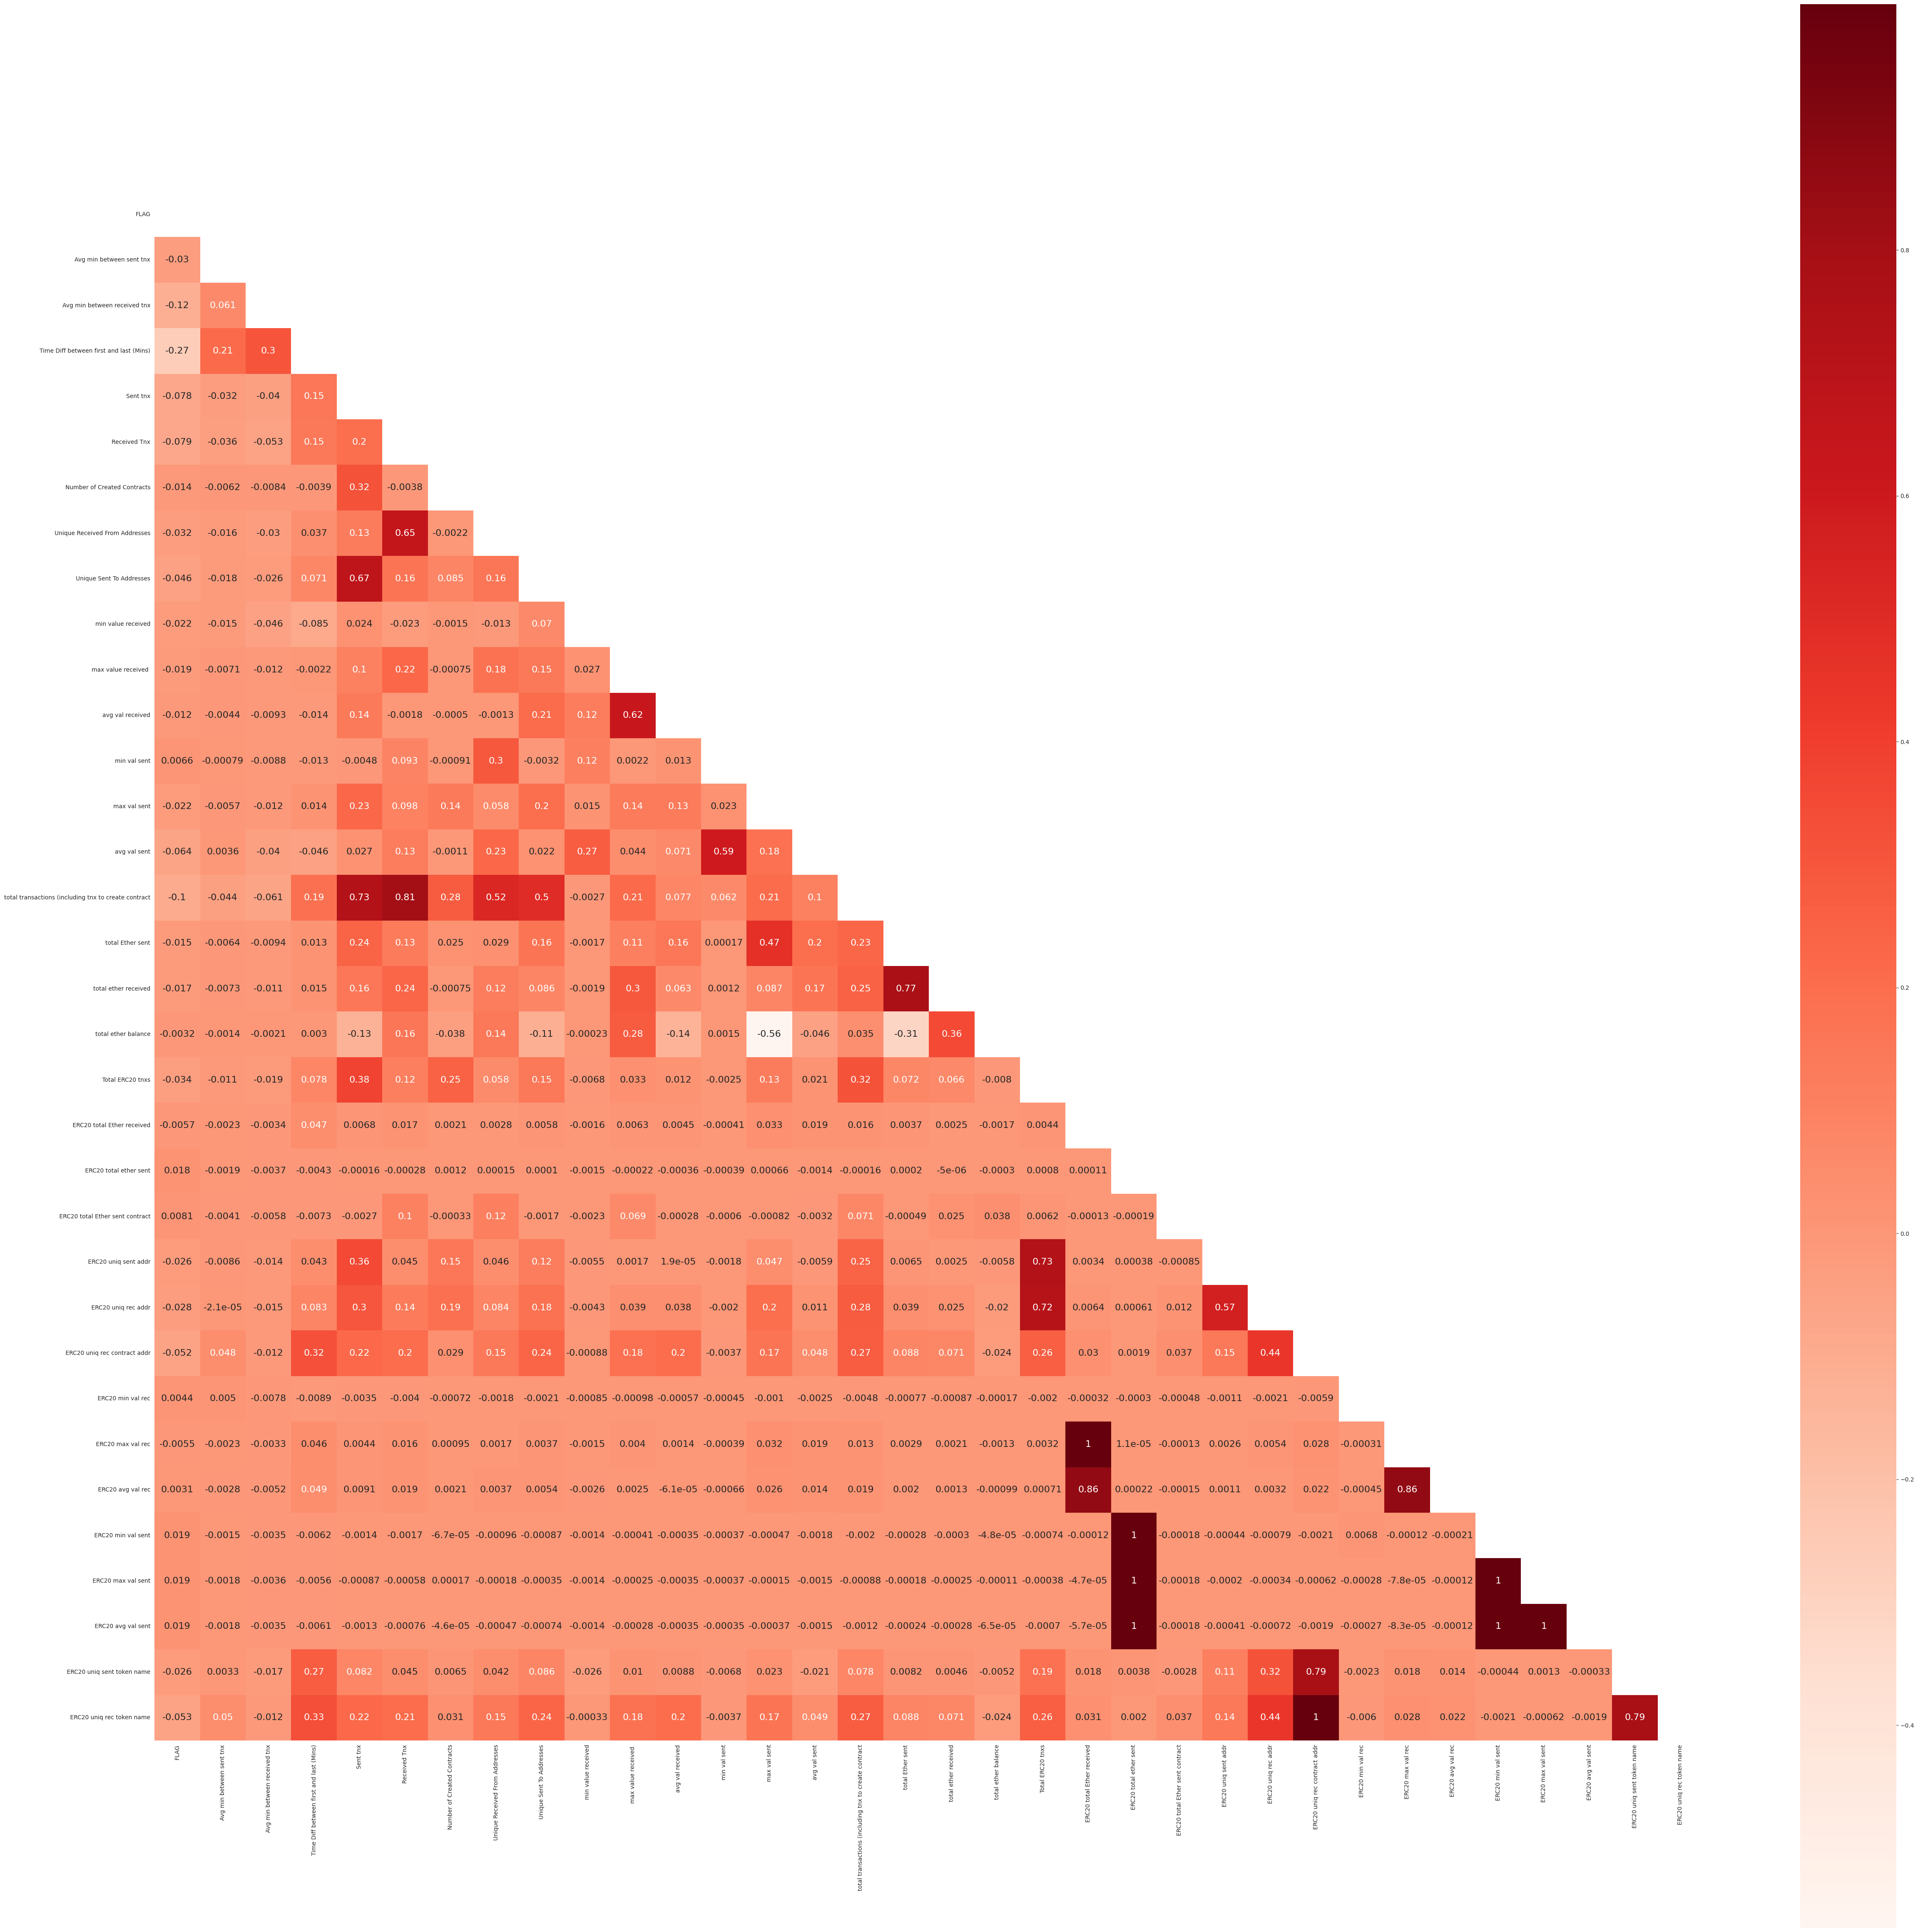

In [163]:
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(60, 60))
    sns.heatmap(corr, mask=mask, cmap='Reds', annot=True, square=True, annot_kws={'size': 16})

In [164]:

sorted_corr = corr.sort_values(by=['FLAG'], key=abs)
sorted_corr

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 uniq rec addr,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
ERC20 avg val rec,0.003132,-0.002829,-0.005241,0.049160,0.009104,0.019382,0.002096,0.003741,0.005412,-0.002610,...,0.003159,0.021501,-0.000455,0.859766,1.000000,-0.000205,-0.000117,-0.000123,0.013764,0.022273
total ether balance,-0.003229,-0.001425,-0.002149,0.002955,-0.127211,0.158146,-0.037902,0.144949,-0.113428,-0.000233,...,-0.019831,-0.023787,-0.000170,-0.001251,-0.000991,-0.000048,-0.000112,-0.000065,-0.005164,-0.023809
ERC20 min val rec,0.004434,0.004998,-0.007794,-0.008921,-0.003480,-0.004043,-0.000724,-0.001784,-0.002093,-0.000847,...,-0.002115,-0.005930,1.000000,-0.000311,-0.000455,0.006815,-0.000280,-0.000265,-0.002288,-0.006013
ERC20 max val rec,-0.005510,-0.002260,-0.003326,0.046278,0.004445,0.015522,0.000946,0.001691,0.003696,-0.001528,...,0.005393,0.027598,-0.000311,1.000000,0.859766,-0.000121,-0.000078,-0.000083,0.017746,0.028497
ERC20 total Ether received,-0.005711,-0.002339,-0.003430,0.046570,0.006840,0.016648,0.002099,0.002832,0.005809,-0.001580,...,0.006393,0.030039,-0.000322,0.999967,0.859823,-0.000125,-0.000047,-0.000057,0.018349,0.030934
min val sent,0.006626,-0.000789,-0.008761,-0.013107,-0.004846,0.093448,-0.000913,0.296240,-0.003166,0.117682,...,-0.001966,-0.003749,-0.000446,-0.000393,-0.000663,-0.000369,-0.000366,-0.000353,-0.006785,-0.003728
ERC20 total Ether sent contract,0.008127,-0.004101,-0.005813,-0.007337,-0.002652,0.104939,-0.000334,0.116755,-0.001697,-0.002331,...,0.012224,0.037021,-0.000477,-0.000125,-0.000154,-0.000184,-0.000183,-0.000177,-0.002817,0.036892
avg val received,-0.011881,-0.004382,-0.009313,-0.014002,0.140677,-0.001786,-0.000498,-0.001324,0.207410,0.122911,...,0.037552,0.202754,-0.000566,0.001390,-0.000061,-0.000354,-0.000349,-0.000346,0.008779,0.200341
Number of Created Contracts,-0.013711,-0.006186,-0.008378,-0.003881,0.320603,-0.003838,1.000000,-0.002211,0.084598,-0.001542,...,0.190766,0.029421,-0.000724,0.000946,0.002096,-0.000067,0.000173,-0.000046,0.006475,0.030527
total Ether sent,-0.014993,-0.006440,-0.009442,0.012999,0.244434,0.132150,0.024877,0.028881,0.164535,-0.001748,...,0.038839,0.088149,-0.000766,0.002944,0.001952,-0.000276,-0.000176,-0.000238,0.008216,0.088281


In [165]:
corr['FLAG']


FLAG                                                    1.000000
Avg min between sent tnx                               -0.029754
Avg min between received tnx                           -0.118533
Time Diff between first and last (Mins)                -0.269354
Sent tnx                                               -0.078006
Received Tnx                                           -0.079316
Number of Created Contracts                            -0.013711
Unique Received From Addresses                         -0.031941
Unique Sent To Addresses                               -0.045584
min value received                                     -0.021641
max value received                                     -0.019259
avg val received                                       -0.011881
min val sent                                            0.006626
max val sent                                           -0.022437
avg val sent                                           -0.063556
total transactions (inclu

In [166]:
drop = ['total transactions (including tnx to create contract',
        ' ERC20 avg val rec',
        ' ERC20 avg val rec',
        ' ERC20 max val rec',
        ' ERC20 min val rec',
        ' ERC20 uniq rec contract addr',
        'max val sent',
        ' ERC20 avg val sent',
        ' ERC20 min val sent',
        ' ERC20 max val sent',
        ' Total ERC20 tnxs',
        'Unique Sent To Addresses',
        'Unique Received From Addresses',
        'total ether received',
        ' ERC20 uniq sent token name',
        'min value received',
        'min val sent',
        ' ERC20 uniq rec addr' ]
df.drop(drop, axis=1, inplace=True)

In [167]:
df.shape

(9841, 17)

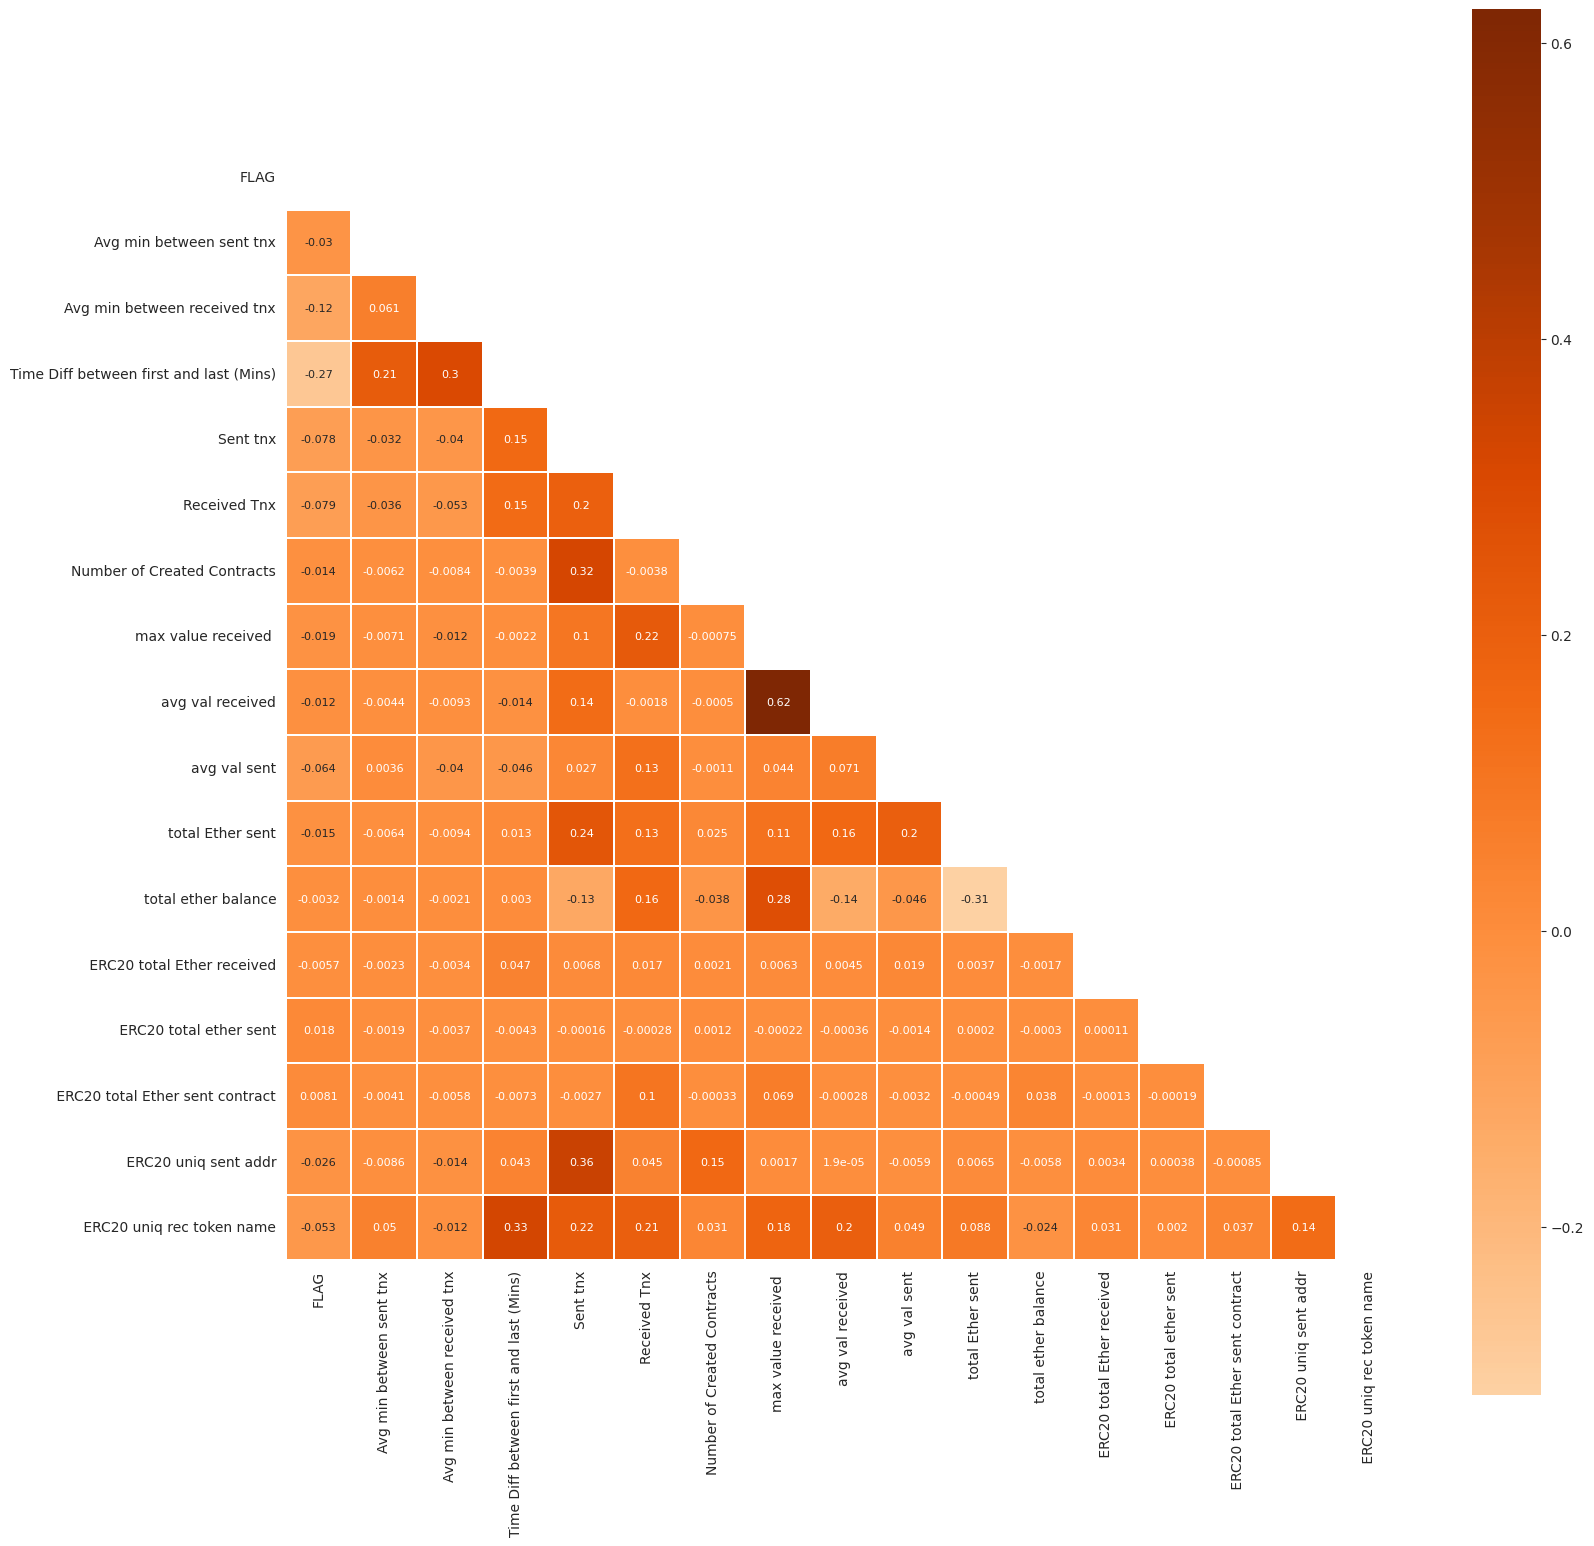

In [168]:
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18, 18))
    sns.heatmap(corr, mask=mask, cmap='Oranges', square=True, annot=True, annot_kws={'size': 8}, center=0, linewidths=0.1)

Training the data

In [169]:
X = df.iloc[:, 1:]
y = df['FLAG']

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [171]:
scaler = StandardScaler()
sc_train = scaler.fit_transform(X_train)

In [172]:
over_sampler = imb.over_sampling.SMOTE()
X_tr_resample, y_tr_resample = over_sampler.fit_resample(sc_train, y_train)

In [173]:
#Target distribution before SMOTE
non_fraud = 0
fraud = 0

for i in y_train:
    if i == 0:
        non_fraud +=1
    else:
        fraud +=1

# Target distribution after SMOTE
no = 0
yes = 1

for j in y_tr_resample:
    if j == 0:
        no +=1
    else:
        yes +=1
print(f'BEFORE OVERSAMPLING \n \tNo of Non-frauds: {non_fraud} \n \tNo of Fauds: {fraud}')
print(f'AFTER OVERSAMPLING \n \tNo of Non-frauds: {no} \n \t No of Fauds: {yes}')


BEFORE OVERSAMPLING 
 	No of Non-frauds: 6152 
 	No of Fauds: 1720
AFTER OVERSAMPLING 
 	No of Non-frauds: 6152 
 	 No of Fauds: 6153


1.Logistic Regression

In [174]:
def lg_reg(X_train, X_test, y_train, y_test, ):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(Fore.RED + "            Logistic Regression Classifier       \n\n")
    print(f'Accuracy  : {accuracy_score(y_test, pred)}')
    print(f'Precision : {precision_score(y_test, pred)}')
    print(f'Recall    : {recall_score(y_test, pred)}')
    print(f'f1 score  : {f1_score(y_test, pred)}\n\n')
    print(classification_report(y_test, pred))
    print(f'Confusion Matrix: {sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap="Reds")}')
    plt.show()

            Logistic Regression Classifier       


Accuracy  : 0.6165566277298121
Precision : 0.36496350364963503
Recall    : 0.8714596949891068
f1 score  : 0.5144694533762059


              precision    recall  f1-score   support

           0       0.93      0.54      0.68      1510
           1       0.36      0.87      0.51       459

    accuracy                           0.62      1969
   macro avg       0.65      0.71      0.60      1969
weighted avg       0.80      0.62      0.64      1969

Confusion Matrix: Axes(0.125,0.11;0.62x0.77)


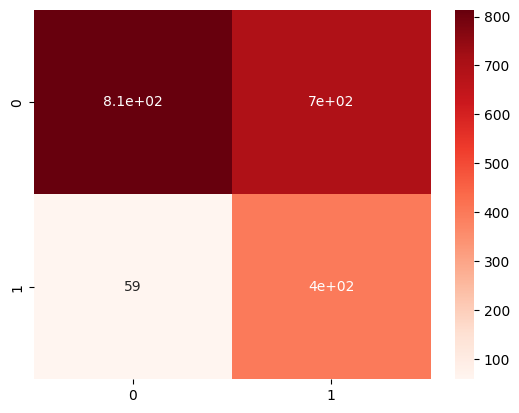

In [175]:
X_test = scaler.transform(X_test)
lg_reg(X_tr_resample,X_test, y_tr_resample, y_test)

2.ADABoost Classifier

In [177]:
def ada_b(X_train, X_test, y_train, y_test):
    model = AdaBoostClassifier()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(Fore.MAGENTA +"            AdaBoost Classifier     \n\n")
    print(f'Accuracy  : {accuracy_score(y_test, pred)}')
    print(f'Precision : {precision_score(y_test, pred)}')
    print(f'Recall    : {recall_score(y_test, pred)}')
    print(f'f1 score  : {f1_score(y_test, pred)}\n\n')
    print(classification_report(y_test, pred))
    print(f'Confusion Matrix:\n{sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap="coolwarm")}')
    plt.show()

            AdaBoost Classifier     


Accuracy  : 0.9818569903948773
Precision : 0.9705215419501134
Recall    : 0.9907407407407407
f1 score  : 0.9805269186712485


              precision    recall  f1-score   support

           0       0.99      0.97      0.98       505
           1       0.97      0.99      0.98       432

    accuracy                           0.98       937
   macro avg       0.98      0.98      0.98       937
weighted avg       0.98      0.98      0.98       937

Confusion Matrix:
Axes(0.125,0.11;0.62x0.77)


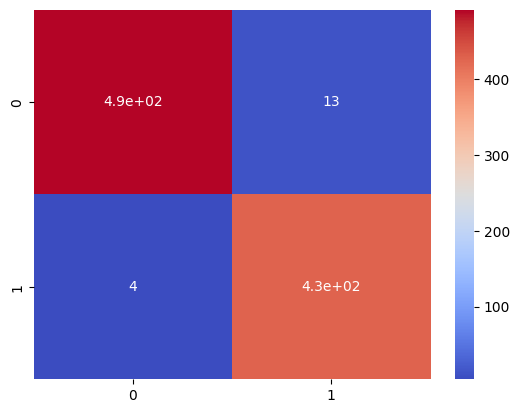

In [34]:
ada_b(X_tr_resample, X_test, y_tr_resample, y_test)

3.Support Vector Machine

            Support Vector Classifier     


Accuracy  : 0.8049771457592687
Precision : 0.553041018387553
Recall    : 0.8518518518518519
f1 score  : 0.6706689536878216


              precision    recall  f1-score   support

           0       0.95      0.79      0.86      1510
           1       0.55      0.85      0.67       459

    accuracy                           0.80      1969
   macro avg       0.75      0.82      0.77      1969
weighted avg       0.85      0.80      0.82      1969

Confusion Matrix:
Axes(0.125,0.11;0.62x0.77)


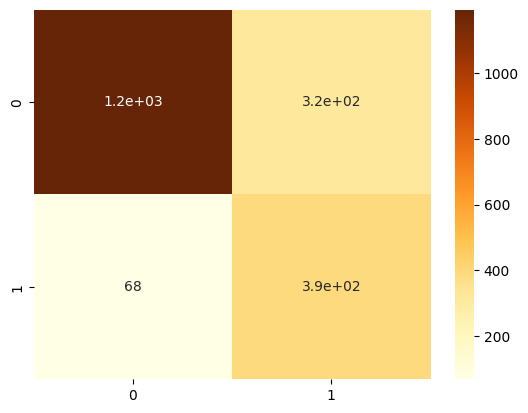

In [178]:
def svm_c(X_train, X_test, y_train, y_test):
    model = SVC(kernel='rbf')
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(Fore.LIGHTRED_EX +"            Support Vector Classifier     \n\n")
    print(f'Accuracy  : {accuracy_score(y_test, pred)}')
    print(f'Precision : {precision_score(y_test, pred)}')
    print(f'Recall    : {recall_score(y_test, pred)}')
    print(f'f1 score  : {f1_score(y_test, pred)}\n\n')
    print(classification_report(y_test, pred))
    print(f'Confusion Matrix:\n{sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap="YlOrBr")}')
    plt.show()

svm_c(X_tr_resample, X_test, y_tr_resample, y_test)

4.Random Forest Classifier

             Random Forest Classifier       


Accuracy  : 0.9715591670898933
Precision : 0.9448123620309051
Recall    : 0.9324618736383442
f1 score  : 0.9385964912280702


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1510
           1       0.94      0.93      0.94       459

    accuracy                           0.97      1969
   macro avg       0.96      0.96      0.96      1969
weighted avg       0.97      0.97      0.97      1969

Confusion Matrix:
Axes(0.125,0.11;0.62x0.77)


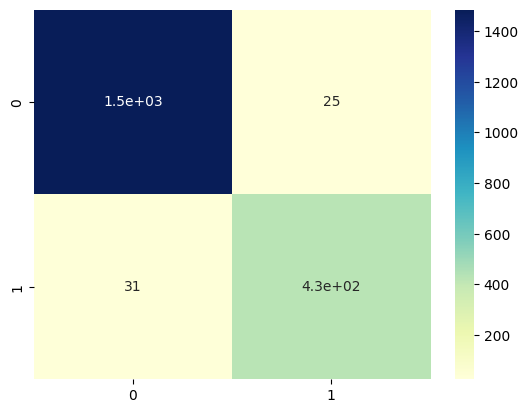

In [179]:
def RF(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(n_estimators=1100, max_depth=27)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(Fore.GREEN +"             Random Forest Classifier       \n\n")
    print(f'Accuracy  : {accuracy_score(y_test, pred)}')
    print(f'Precision : {precision_score(y_test, pred)}')
    print(f'Recall    : {recall_score(y_test, pred)}')
    print(f'f1 score  : {f1_score(y_test, pred)}\n\n')
    print(classification_report(y_test, pred))
    print(f'Confusion Matrix:\n{sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap="YlGnBu" )}')
    plt.show()
RF(X_tr_resample, X_test, y_tr_resample, y_test)

5.Catboost Classifier

0:	learn: 0.6623595	total: 27.7ms	remaining: 27.7s
1:	learn: 0.6290183	total: 65.5ms	remaining: 32.7s
2:	learn: 0.6006115	total: 98.8ms	remaining: 32.8s
3:	learn: 0.5750895	total: 118ms	remaining: 29.3s
4:	learn: 0.5512931	total: 139ms	remaining: 27.7s
5:	learn: 0.5265004	total: 183ms	remaining: 30.3s
6:	learn: 0.5026081	total: 227ms	remaining: 32.2s
7:	learn: 0.4844366	total: 255ms	remaining: 31.6s
8:	learn: 0.4695121	total: 285ms	remaining: 31.4s
9:	learn: 0.4537920	total: 309ms	remaining: 30.6s
10:	learn: 0.4369445	total: 347ms	remaining: 31.2s
11:	learn: 0.4204644	total: 375ms	remaining: 30.9s
12:	learn: 0.4082557	total: 400ms	remaining: 30.4s
13:	learn: 0.3931270	total: 433ms	remaining: 30.5s
14:	learn: 0.3790237	total: 458ms	remaining: 30.1s
15:	learn: 0.3663791	total: 485ms	remaining: 29.9s
16:	learn: 0.3542527	total: 510ms	remaining: 29.5s
17:	learn: 0.3424732	total: 544ms	remaining: 29.7s
18:	learn: 0.3328083	total: 578ms	remaining: 29.8s
19:	learn: 0.3233458	total: 616ms	rema

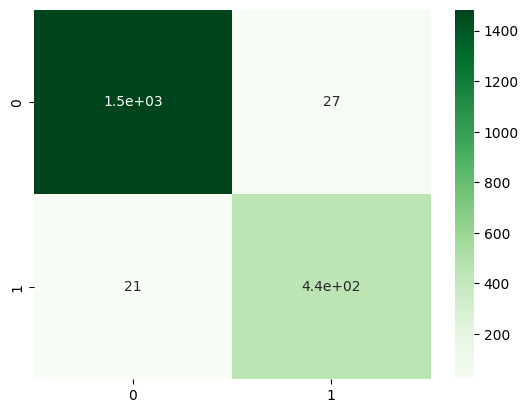

In [184]:
def cat_b(X_train, X_test, y_train, y_test):
    model = ctb.CatBoostClassifier(learning_rate=0.017, verbose=1)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(Fore.CYAN +"             Catboost Classifier       \n\n")
    print(f'Accuracy  : {accuracy_score(y_test, pred)}')
    print(f'Precision : {precision_score(y_test, pred)}')
    print(f'Recall    : {recall_score(y_test, pred)}')
    print(f'f1 score  : {f1_score(y_test, pred)}\n\n')
    print(classification_report(y_test, pred))
    print(f'Confusion Matrix:\n{sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap="Greens" )}')
    plt.show()
cat_b(X_tr_resample, X_test, y_tr_resample, y_test)

6.XGBoost Classifier

         Extrem Gradient Boosting Classifier       


Accuracy  : 0.973590655154901
Precision : 0.9414316702819957
Recall    : 0.9455337690631809
f1 score  : 0.9434782608695652


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1510
           1       0.94      0.95      0.94       459

    accuracy                           0.97      1969
   macro avg       0.96      0.96      0.96      1969
weighted avg       0.97      0.97      0.97      1969

Confusion Matrix:
Axes(0.125,0.11;0.62x0.77)


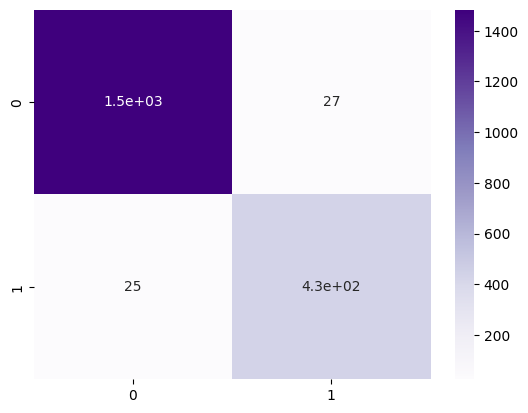

In [185]:
def xgb_c(X_train, X_test, y_train, y_test):
    model = xgb.XGBClassifier()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(Fore.BLUE +"         Extrem Gradient Boosting Classifier       \n\n")
    print(f'Accuracy  : {accuracy_score(y_test, pred)}')
    print(f'Precision : {precision_score(y_test, pred)}')
    print(f'Recall    : {recall_score(y_test, pred)}')
    print(f'f1 score  : {f1_score(y_test, pred)}\n\n')
    print(classification_report(y_test, pred))
    print(f'Confusion Matrix:\n{sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap="Purples" )}')
    plt.show()

xgb_c(X_tr_resample, X_test, y_tr_resample, y_test)

In [186]:
model = xgb.XGBClassifier()
model.fit(X_tr_resample, y_tr_resample,)
y_pred = model.predict(X_test)
round(f1_score(y_test, y_pred), 2)

0.94

Hyperparameter tunig for XGBoost Classifier

In [187]:
# params = {'learning_rate': [0.01, 0.02, 0.05],
#          'max_depth': [5, 6, 7],
#          'n_estimators': [200, 300, 400, 500],
#          'gamma': [0.1, 0.2]}
# grid = GridSearchCV(estimator=model, param_grid=params, scoring='f1', verbose=0)

# grid.fit(X_tr_resample, y_tr_resample)

# print(f'Best Parameters: {grid.best_params_}')
# print(f'Best Estimator : {grid.best_estimator_}')
# print(f'Best f1 Score  : {round(grid.best_score_, 3)}')

In [188]:
def classification_evaluation(y_true, y_pred):
    print(f'        Model Evaluation       ')
    print(f'ACCURACY : {accuracy_score(y_true, y_pred):.3f}')
    print(f'RECALL   : {recall_score(y_true, y_pred):.3f}')
    print(f'PRECISION: {precision_score(y_true, y_pred):.3f}')
    print(f'F1 SCORE : {f1_score(y_true, y_pred):.3f}')


In [192]:
best_model_xgb = xgb.XGBClassifier(
    gamma=0.5, learning_rate=0.005,max_delta_step=0, max_depth=23,n_estimators=700,
              )


best_model_xgb.fit(X_tr_resample, y_tr_resample)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.005, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=23, max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=700,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [193]:
y_pred_train = best_model_xgb.predict(X_tr_resample)
print('Train Set: ')
classification_evaluation(y_tr_resample, y_pred_train)

Train Set: 
        Model Evaluation       
ACCURACY : 0.998
RECALL   : 0.999
PRECISION: 0.996
F1 SCORE : 0.998


In [194]:
y_pred_test = best_model_xgb.predict(X_test)
print('Test Set: ')
classification_evaluation(y_test, y_pred_test)

Test Set: 
        Model Evaluation       
ACCURACY : 0.968
RECALL   : 0.930
PRECISION: 0.932
F1 SCORE : 0.931


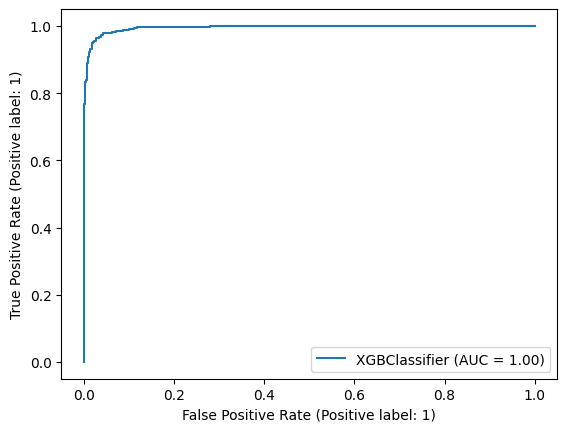

In [195]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model,
               X_test, y_test)
plt.show()

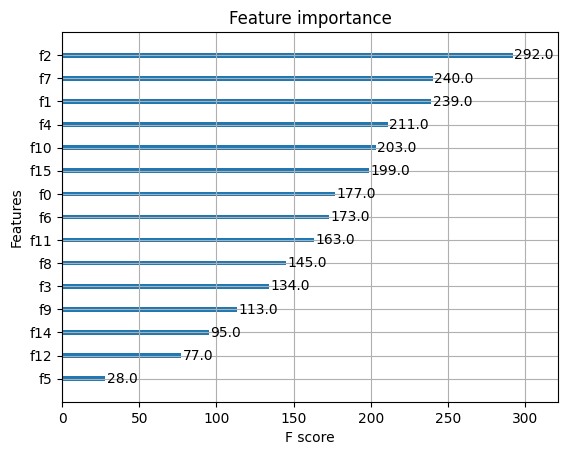

In [196]:
from xgboost import plot_importance
plot_importance(model)
plt.show()

In [197]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define the model
model = XGBClassifier()

# Define the parameters grid
param_grid = {
    'gamma': [0, 0.1, 0.5, 1],
    'max_delta_step': [0, 1, 5],
    'max_depth': [3, 6, 9, 12],
    'n_estimators': [50, 100, 200, 300]
}

# Set up the cross-validation strategy
kfold = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# Set up the grid search
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', n_jobs=-1, cv=kfold, verbose=3)

# Fit grid_search to the data
grid_search.fit(X, y)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)


Fitting 7 folds for each of 192 candidates, totalling 1344 fits
Best parameters found:  {'gamma': 0, 'max_delta_step': 0, 'max_depth': 12, 'n_estimators': 300}
Best accuracy found:  0.984046366758485
